In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The Marketing department of Adventure Works Cycles wants to increase sales by targeting specific customers for a mailing campaign. The company's database contains a list of past customers and a list of potential new customers. By investigating the attributes of previous bike buyers, the company hopes to discover patterns that they can then apply to potential customers. They hope to use the discovered patterns to predict which potential customers are most likely to purchase a bike from Adventure Works Cycles.

## Part I: Based on Feature Selection, Cleaning, and Preprocessing to Construct an Input from Data Source
### (a) Examine the values of each attribute and Select a set of attributes only that would affect to predict future bike buyers to create your input for data mining algorithms. Remove all the unnecessary attributes. (Select features just by analysis).
### (b) Create a new Data Frame with the selected attributes only.
### (c) Determine a Data value type (Discrete, or Continuous, then Nominal, Ordinal, Interval, Ratio) of each attribute in your selection to identify preprocessing tasks to create input for your data mining.

In [3]:
data = pd.read_csv('AWCustomers.csv')
data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [4]:
data.shape

(18361, 24)

In [5]:
data.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
LastUpdated             object
dtype: object

In [6]:
for i in data.columns:
    print("Column", i, "has",data[i].isna().sum(), 'NULL VALUES')

Column CustomerID has 0 NULL VALUES
Column Title has 18260 NULL VALUES
Column FirstName has 0 NULL VALUES
Column MiddleName has 7789 NULL VALUES
Column LastName has 0 NULL VALUES
Column Suffix has 18358 NULL VALUES
Column AddressLine1 has 0 NULL VALUES
Column AddressLine2 has 18050 NULL VALUES
Column City has 0 NULL VALUES
Column StateProvinceName has 0 NULL VALUES
Column CountryRegionName has 0 NULL VALUES
Column PostalCode has 0 NULL VALUES
Column PhoneNumber has 0 NULL VALUES
Column BirthDate has 0 NULL VALUES
Column Education has 0 NULL VALUES
Column Occupation has 0 NULL VALUES
Column Gender has 0 NULL VALUES
Column MaritalStatus has 0 NULL VALUES
Column HomeOwnerFlag has 0 NULL VALUES
Column NumberCarsOwned has 0 NULL VALUES
Column NumberChildrenAtHome has 0 NULL VALUES
Column TotalChildren has 0 NULL VALUES
Column YearlyIncome has 0 NULL VALUES
Column LastUpdated has 0 NULL VALUES


In [7]:
df = data[['City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'TotalChildren',
       'YearlyIncome']]

In [8]:
from datetime import date

def birthDayGone(str):
    if(int(str[5:7]) < int(date.today().month)):
        return date.today().year - int(str[0:4])
    elif(int(str[5:7]) == int(date.today().month)):
        if(int(str[7:9]) <= int(date.today().day)):
            return date.today().year - int(str[0:4])
    return date.today().year - int(str[0:4]) - 1

In [19]:
df['Age'] = df.BirthDate.apply(birthDayGone)

C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/3684430470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.BirthDate.apply(birthDayGone)


In [20]:
df.drop(columns = ['BirthDate'], inplace=True)

C:\Users\Vyom\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df['Occupation']=df['Occupation'].map({'Manual':1,'Skilled Manual':2,'Clerical':3,'Management':4,'Professional':5})

C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/2298760144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation']=df['Occupation'].map({'Manual':1,'Skilled Manual':2,'Clerical':3,'Management':4,'Professional':5})


In [12]:
df['Education']=df['Education'].map({'Partial High School':1,'High School':2,'Partial College':3,'Bachelors':4,'Graduate Degree':5})

C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/4038010118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=df['Education'].map({'Partial High School':1,'High School':2,'Partial College':3,'Bachelors':4,'Graduate Degree':5})


In [14]:
def handle_cardinal_cols(df):
    df['Male']=df['Gender'].map({'M':1,'F':0})
    df.drop(['Gender'],axis=1,inplace=True)
    df['MaritalStatus']=df['MaritalStatus'].map({'M':1,'S':0})
    
    return df

In [15]:
df=handle_cardinal_cols(df)
df.head()

C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/1477873626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male']=df['Gender'].map({'M':1,'F':0})
C:\Users\Vyom\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/1477873626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome,Age,Male
0,Wollongong,New South Wales,Australia,2500,1987-11-13,4,3,1,1,3,1,81916,34,1
1,Shawnee,British Columbia,Canada,V9B 2C3,1972-07-21,3,3,1,1,2,2,81076,50,1
2,West Covina,California,United States,91791,1985-11-09,4,3,0,0,3,0,86387,36,0
3,Liverpool,England,United Kingdom,L4 4HB,1977-10-18,3,2,1,1,2,2,61481,44,1
4,Werne,Nordrhein-Westfalen,Germany,59368,1975-02-05,3,2,0,1,1,0,51804,47,1


In [16]:
df.head()

,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome,Age,Male
0,Wollongong,New South Wales,Australia,2500,1987-11-13,4,3,1,1,3,1,81916,34,1
1,Shawnee,British Columbia,Canada,V9B 2C3,1972-07-21,3,3,1,1,2,2,81076,50,1
2,West Covina,California,United States,91791,1985-11-09,4,3,0,0,3,0,86387,36,0
3,Liverpool,England,United Kingdom,L4 4HB,1977-10-18,3,2,1,1,2,2,61481,44,1
4,Werne,Nordrhein-Westfalen,Germany,59368,1975-02-05,3,2,0,1,1,0,51804,47,1


#####  City -> Discrete, Nominal 
#####  StateProvinceName -> Discrete, Nominal
#####  CountryRegionName -> Discrete, Nominal
#####  PostalCode -> Discrete, Nominal
#####  Education -> Discrete, Ordinal
#####  Occupation -> Discrete, Nominal
#####  Gender -> Discrete, Nominal
#####  MaritalStatus -> Discrete, Nominal
#####  HomeOwnerFlag -> Discrete, Interval
#####  NumberCarsOwned -> Discrete, Interval
#####  TotalChildren -> Discrete, Interval
#####  YearlyIncome ->  Discrete, Ordinal
##### Age -> Discrete, Ordinal

<AxesSubplot:>

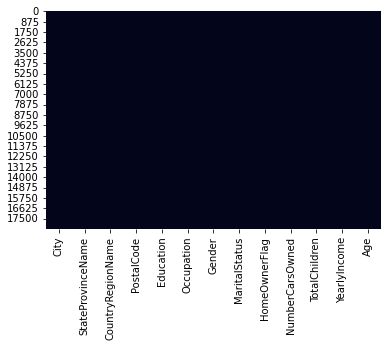

In [12]:
sns.heatmap(df.isnull(), cbar=False)

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Education"]=encoder.fit_transform(df['Education'])
df["Occupation"]=encoder.fit_transform(df['Occupation'])

C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/2615352838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"]=encoder.fit_transform(df['Education'])
C:\Users\Vyom\AppData\Local\Temp/ipykernel_12168/2615352838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Occupation"]=encoder.fit_transform(df['Occupation'])


In [21]:
df.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome,Age,Male
0,Wollongong,New South Wales,Australia,2500,3,2,1,1,3,1,81916,34,1
1,Shawnee,British Columbia,Canada,V9B 2C3,2,2,1,1,2,2,81076,50,1
2,West Covina,California,United States,91791,3,2,0,0,3,0,86387,36,0
3,Liverpool,England,United Kingdom,L4 4HB,2,1,1,1,2,2,61481,44,1
4,Werne,Nordrhein-Westfalen,Germany,59368,2,1,0,1,1,0,51804,47,1


In [22]:
from scipy.spatial import distance

In [24]:
distance.cosine(df['Education'].values,df['YearlyIncome'].values)

0.09897880813789772

In [25]:
distance.jaccard(df['Education'].values,df['YearlyIncome'].values)

1.0

In [26]:
 from scipy.stats import pearsonr
pearsonr(df['Education'].values,df['YearlyIncome'].values)[0]

0.46766483550548943